# Preprocessing danych, inżynieria cech i wstępne modelowanie


In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [11]:
data = pd.read_csv("../data/data.csv")

In [12]:
data.head(10)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1
5,0.277199,-0.010098,-0.105137,-0.997335,-0.990487,-0.995420,-0.997627,-0.990218,-0.995549,-0.942469,...,-0.545410,-0.844619,0.082632,-0.143439,0.275041,-0.368224,-0.849632,0.184823,-0.042126,1
6,0.279454,-0.019641,-0.110022,-0.996921,-0.967186,-0.983118,-0.997003,-0.966097,-0.983116,-0.940987,...,-0.217198,-0.564430,-0.212754,-0.230622,0.014637,-0.189512,-0.852150,0.182170,-0.043010,1
7,0.277432,-0.030488,-0.125360,-0.996559,-0.966728,-0.981585,-0.996485,-0.966313,-0.982982,-0.940987,...,-0.082307,-0.421715,-0.020888,0.593996,-0.561871,0.467383,-0.851017,0.183779,-0.041976,1
8,0.277293,-0.021751,-0.120751,-0.997328,-0.961245,-0.983672,-0.997596,-0.957236,-0.984379,-0.940598,...,-0.269401,-0.572995,0.012954,0.080936,-0.234313,0.117797,-0.847971,0.188982,-0.037364,1
9,0.280586,-0.009960,-0.106065,-0.994803,-0.972758,-0.986244,-0.995405,-0.973663,-0.985642,-0.940028,...,0.339526,0.140452,-0.020590,-0.127730,-0.482871,-0.070670,-0.848294,0.190310,-0.034417,1


Przypomnienie kolumn:
- tBodyAcc-XYZ
- tBodyAccJerk-XYZ
- tBodyAccMag
- tBodyAccJerkMag
- tGravityAcc-XYZ
- tGravityAccMag
- tBodyGyro-XYZ
- tBodyGyroJerk-XYZ
- tBodyGyroMag
- tBodyGyroJerkMag 

- fBodyAcc-XYZ
- fBodyAccJerk-XYZ
- fBodyAccMag
- fBodyAccJerkMag
- fBodyGyro-XYZ
- fBodyGyroMag
- fBodyGyroJerkMag

Przedrostek 't': sygnał w domenie czasu, 'f': sygnał w domenie częstotliwości po tranformacji fouriera (był wzór poprzednio, przekształca funckje czasową w funkcję częstotliwości).

Dla każdego sygnału mamy dane następujące statystyki:
- max()
- mad() - mediana odchylenia bezwzględnego
- min()
- kurtosis() - jedna z miar kształtu rozkładu częstotliwości sygnału 
- bandsEnergy() - energia przedziału częstotliwości w przedziałach FFT każdego okna
- mean()
- meanFreq()
- arCoeff() - współczynnik autoregresji
- entropy() - entropia sygnału, średnia ilość informacji przypadająca na pojedynczą wiadomość ze źródła
- iqr() - $Q_3 - Q_1 $
- sma() - obszar wielkości sygnału
- std()
- maxInds - indeks składowej częstotliwości o największej wartości
- skewness()
- energy()
- correlation()

Powinniśmy się zatem skupić na tym dla jakich sygnałów ważna będzie informacja w domenie czasowej, częstotliwości albo w obu domenach oraz jakie statystyki chcemy z tych sygnałów analizować.

Zauważmy też, że nasze dane są już znaturalizowane oraz nie ma danych kategorycznych, zatem tymi krokami nie musimy się zajmować.

In [13]:
data.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,...,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000
mean,0.274347,-0.017743,-0.108925,-0.607784,-0.510191,-0.613064,-0.633593,-0.525697,-0.614989,-0.466732,...,-0.298592,-0.617700,0.007705,0.002648,0.017683,-0.009219,-0.496522,0.063255,-0.054284,16.146422
std,0.067628,0.037128,0.053033,0.438694,0.500240,0.403657,0.413333,0.484201,0.399034,0.538707,...,0.320199,0.308796,0.336591,0.447364,0.616188,0.484770,0.511158,0.305468,0.268898,8.679067
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
25%,0.262625,-0.024902,-0.121019,-0.992360,-0.976990,-0.979137,-0.993293,-0.977017,-0.979064,-0.935788,...,-0.536174,-0.841847,-0.124694,-0.287031,-0.493108,-0.389041,-0.817288,0.002151,-0.131880,9.000000
50%,0.277174,-0.017162,-0.108596,-0.943030,-0.835032,-0.850773,-0.948244,-0.843670,-0.845068,-0.874825,...,-0.335160,-0.703402,0.008146,0.007668,0.017192,-0.007186,-0.715631,0.182028,-0.003882,17.000000
75%,0.288354,-0.010625,-0.097589,-0.250293,-0.057336,-0.278737,-0.302033,-0.087405,-0.288149,-0.014641,...,-0.113167,-0.487981,0.149005,0.291490,0.536137,0.365996,-0.521503,0.250790,0.102970,24.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,30.000000


z sygnałów bym zostawił 
- tBodyAcc
- tBodyAccMag
- tBodyAccJerkMag
- tGravityAcc
- tGravityAccMag
- tBodyGyro
- tBodyGyroJerk

- fBodyAccJerk
- fBodyAccMag
- fBodyAccJerkMag

ale póki co puszcze na wszystkim

ze statystyk skupiłbym się na średniej i odchyleniu standardowym, gdyż dosyć dokładnie opisują daną aktywność.

## Selekcja cech

In [14]:
to_drop = [t for t in data.columns if not ('std' in t or 'mean' in t)]

In [15]:
data.drop(to_drop, axis=1, inplace=True)
data.head(10)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tGravityAcc-mean()-X,tGravityAcc-mean()-Y,tGravityAcc-mean()-Z,tGravityAcc-std()-X,...,fBodyAccMag-meanFreq(),fBodyBodyAccJerkMag-mean(),fBodyBodyAccJerkMag-std(),fBodyBodyAccJerkMag-meanFreq(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-meanFreq()
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,0.963396,-0.140840,0.115375,-0.985250,...,-0.088436,-0.993726,-0.993755,0.346989,-0.980135,-0.961309,-0.128989,-0.991990,-0.990697,-0.074323
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,0.966561,-0.141551,0.109379,-0.997411,...,-0.044150,-0.990335,-0.991960,0.532061,-0.988296,-0.983322,-0.271958,-0.995854,-0.996399,0.158075
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,0.966878,-0.142010,0.101884,-0.999574,...,0.257899,-0.989280,-0.990867,0.660795,-0.989255,-0.986028,-0.212728,-0.995031,-0.995127,0.414503
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,0.967615,-0.143976,0.099850,-0.996646,...,0.073581,-0.992769,-0.991700,0.678921,-0.989413,-0.987836,-0.035684,-0.995221,-0.995237,0.404573
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,0.968224,-0.148750,0.094486,-0.998429,...,0.394310,-0.995523,-0.994389,0.559058,-0.991433,-0.989059,-0.273582,-0.995093,-0.995465,0.087753
5,0.277199,-0.010098,-0.105137,-0.997335,-0.990487,-0.995420,0.967948,-0.148210,0.091910,-0.998979,...,0.437962,-0.994733,-0.995156,0.246910,-0.990500,-0.985861,-0.297329,-0.995143,-0.995239,0.019953
6,0.279454,-0.019641,-0.110022,-0.996921,-0.967186,-0.983118,0.967929,-0.144282,0.093145,-0.999332,...,0.219962,-0.987886,-0.990546,0.290177,-0.988269,-0.984569,-0.257032,-0.995641,-0.994639,0.145844
7,0.277432,-0.030488,-0.125360,-0.996559,-0.966728,-0.981585,0.968491,-0.146705,0.091708,-0.998118,...,-0.109763,-0.989851,-0.989790,0.249799,-0.989431,-0.987065,-0.197272,-0.995629,-0.994507,0.136382
8,0.277293,-0.021751,-0.120751,-0.997328,-0.961245,-0.983672,0.968481,-0.154374,0.085118,-0.997789,...,0.083767,-0.992073,-0.992890,0.272342,-0.991629,-0.991759,0.073417,-0.995260,-0.996007,0.314038
9,0.280586,-0.009960,-0.106065,-0.994803,-0.972758,-0.986244,0.968418,-0.156302,0.080874,-0.997362,...,0.425821,-0.982317,-0.984057,0.250884,-0.984788,-0.980388,-0.139966,-0.990981,-0.990599,0.267383


## Proste modele

In [22]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [31]:
def scatter(x, labels):
    
    
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40,
                    c=labels)
    ax.axis('off')
    ax.axis('tight')

    txts = []
    for i in range(10):
        xtext, ytext = np.median(x[labels == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txts.append(txt)

    return f, ax, sc, txts

In [32]:
pca = PCA(n_components=2)
digits_proj_pca = pca.fit_transform(data)

### KMeans

In [35]:
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(data)
y_kmeans = kmeans.predict(data)

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


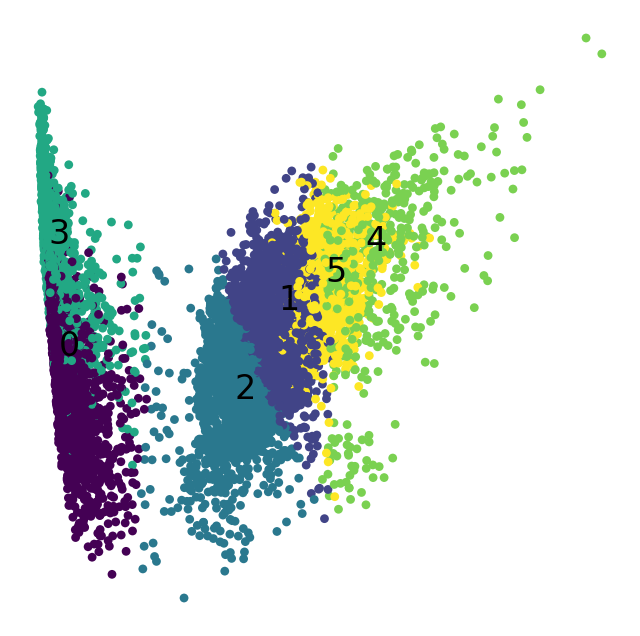

In [36]:
scatter(digits_proj_pca, y_kmeans)
plt.show()